#Importing Data

In [2]:
import csv
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
conn = sqlite3.connect('/content/airbnb.db', isolation_level=None, detect_types=sqlite3.PARSE_COLNAMES)
db_df_c = pd.read_sql_query("SELECT * FROM Calendar", conn)
db_df_l = pd.read_sql_query("SELECT * FROM Listings", conn)
db_df_h = pd.read_sql_query("SELECT * FROM Hosts", conn)
db_df_r = pd.read_sql_query("SELECT * FROM Reviews", conn)

db_df_c.to_csv('calendar.csv', index=False)
db_df_l.to_csv('listings.csv', index=False)
db_df_h.to_csv('hosts.csv', index=False)
db_df_r.to_csv('reviews.csv', index=False)

In [4]:
df_c = pd.read_csv("/content/calendar.csv")
df_l = pd.read_csv("/content/listings.csv")
df_h = pd.read_csv("/content/hosts.csv")
df_r = pd.read_csv("/content/reviews.csv")


#Data Understanding and feature creation

##1-For Calender Table

In [21]:
df_c.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125


In [25]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319192 non-null  int64  
 1   listing_id      319192 non-null  int64  
 2   date            319192 non-null  object 
 3   available       319192 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319192 non-null  int64  
 7   maximum_nights  319192 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


In [37]:
len(df_c.listing_id.unique())

1749

##2-For Listings table

In [ ]:
df_l.head()

In [27]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB


In [38]:
len(df_l.listing_id.unique())

1749

##3-For Host table

In [ ]:
df_h.head()

In [28]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1112 non-null   object
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: object(5)
memory usage: 43.6+ KB


##4-For Reviews Table

In [ ]:
df_r.head()

In [29]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63658 entries, 0 to 63657
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review_id      63658 non-null  object 
 1   listing_id     62987 non-null  float64
 2   date           62987 non-null  object 
 3   reviewer_id    62987 non-null  float64
 4   reviewer_name  62987 non-null  object 
 5   comments       62923 non-null  object 
dtypes: float64(2), object(4)
memory usage: 2.9+ MB


In [40]:
len(df_r.listing_id.unique())

1526

#Merging Column

In [5]:
df = pd.read_sql_query("""SELECT 
                          Calendar.listing_id,
                          Calendar.available,
                          Calendar.price,
                          Calendar.adjusted_price,
                          Calendar.minimum_nights,
                          Calendar.maximum_nights,
                          Listings.property_type,
                          Listings.room_type,
                          Listings.accomodates,
                          Listings.bathrooms_text,
                          Listings.bedrooms,
                          Listings.beds 
                          FROM Calendar 
                          LEFT JOIN Listings ON Calendar.listing_id = Listings.listing_id 
                          LEFT JOIN Hosts ON Listings.host_id = Hosts.host_id""", conn)


df.to_csv('database.csv', index=False)


In [6]:
df = pd.read_csv("/content/database.csv")

In [7]:
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds
0,40334325,0,56.0,56.0,3,5,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0
1,22742449,1,95.0,95.0,2,99,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0
2,34621717,0,75.0,75.0,2,1125,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0
3,38281744,1,150.0,150.0,1,1000,Room in hotel,Private room,2,1 bath,1.0,1.0
4,18835003,0,100.0,100.0,2,1125,Entire loft,Entire home/apt,2,1 bath,1.0,1.0


##Data Cleaning

In [8]:
#Print all Type of values present in the column
print("available Types = "+str(df.available.unique())) 
print()
print("property Types = "+str(len(df.property_type.unique())))
print()
print("room Type = "+str(df.room_type.unique()))
print()
print("bathrooms Type = "+str(df.bathrooms_text.unique()))
print()

available Types = [0 1]

property Types = 39

room Type = ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']

bathrooms Type = ['1 bath' '2.5 shared baths' '1.5 baths' '1 private bath'
 '1.5 shared baths' '1 shared bath' '4 baths' '3 baths' '2.5 baths'
 '2 baths' '2 shared baths' '3 shared baths' '3.5 baths' '0 shared baths'
 'Half-bath' '5 baths' 'Private half-bath' 'Shared half-bath' '8.5 baths'
 '6 baths' '7.5 baths' '0 baths' '8 baths' '4 shared baths' '15.5 baths'
 '6.5 baths']



In [9]:
#Check for null values in Data frame
df.isnull().sum(axis = 0)

listing_id            0
available             0
price                75
adjusted_price       75
minimum_nights        0
maximum_nights        0
property_type         0
room_type             0
accomodates           0
bathrooms_text        0
bedrooms          23376
beds               7428
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      319192 non-null  int64  
 1   available       319192 non-null  int64  
 2   price           319117 non-null  float64
 3   adjusted_price  319117 non-null  float64
 4   minimum_nights  319192 non-null  int64  
 5   maximum_nights  319192 non-null  int64  
 6   property_type   319192 non-null  object 
 7   room_type       319192 non-null  object 
 8   accomodates     319192 non-null  int64  
 9   bathrooms_text  319192 non-null  object 
 10  bedrooms        295816 non-null  float64
 11  beds            311764 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 29.2+ MB


In [11]:
df['beds'] = df['beds'].fillna(0)
df['price'] = df['price'].fillna(0)
df['adjusted_price'] = df['adjusted_price'].fillna(0)
df['bedrooms'] = df['bedrooms'].fillna(0)

df['beds'] = df['beds'].astype(float)
df['price'] = df['price'].astype(float)
df['adjusted_price'] = df['adjusted_price'].astype(float)
df['bedrooms'] = df['bedrooms'].astype(float)

In [12]:
df['bathrooms_text'] = df['bathrooms_text'].str.replace('Private half-bath','0.5')
df['bathrooms_text'] = df['bathrooms_text'].str.replace('Shared half-bath','0.5')
df['bathrooms_text'] = df['bathrooms_text'].str.replace(' shared baths','')
df['bathrooms_text'] = df['bathrooms_text'].str.replace(' shared bath','')
df['bathrooms_text'] = df['bathrooms_text'].str.replace(' private bath','')
df['bathrooms_text'] = df['bathrooms_text'].str.replace('Half-bath','0.5')
df['bathrooms_text'] = df['bathrooms_text'].str.replace(' baths','')
df['bathrooms_text'] = df['bathrooms_text'].str.replace(' bath','')

In [13]:
df.bathrooms_text.unique()

array(['1', '2.5', '1.5', '4', '3', '2', '3.5', '0', '0.5', '5', '8.5',
       '6', '7.5', '8', '15.5', '6.5'], dtype=object)

In [14]:
df['bathrooms_text'] = df['bathrooms_text'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      319192 non-null  int64  
 1   available       319192 non-null  int64  
 2   price           319192 non-null  float64
 3   adjusted_price  319192 non-null  float64
 4   minimum_nights  319192 non-null  int64  
 5   maximum_nights  319192 non-null  int64  
 6   property_type   319192 non-null  object 
 7   room_type       319192 non-null  object 
 8   accomodates     319192 non-null  int64  
 9   bathrooms_text  319192 non-null  float64
 10  bedrooms        319192 non-null  float64
 11  beds            319192 non-null  float64
dtypes: float64(5), int64(5), object(2)
memory usage: 29.2+ MB


In [16]:
df.head(3)

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds
0,40334325,0,56.0,56.0,3,5,Entire rental unit,Entire home/apt,2,1.0,0.0,2.0
1,22742449,1,95.0,95.0,2,99,Entire rental unit,Entire home/apt,4,1.0,2.0,2.0
2,34621717,0,75.0,75.0,2,1125,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0


In [17]:
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds
0,40334325,0,56.0,56.0,3,5,Entire rental unit,Entire home/apt,2,1.0,0.0,2.0
1,22742449,1,95.0,95.0,2,99,Entire rental unit,Entire home/apt,4,1.0,2.0,2.0
2,34621717,0,75.0,75.0,2,1125,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0
3,38281744,1,150.0,150.0,1,1000,Room in hotel,Private room,2,1.0,1.0,1.0
4,18835003,0,100.0,100.0,2,1125,Entire loft,Entire home/apt,2,1.0,1.0,1.0


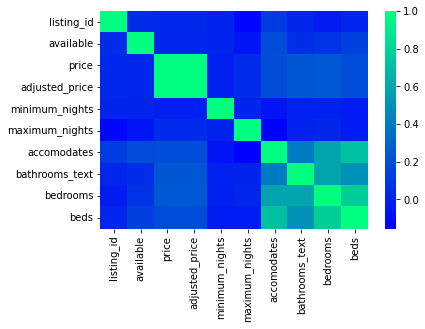

In [18]:
sns.heatmap(df.corr(),cmap='winter')

In [19]:
df1 = df.drop(['property_type' , 'room_type'],axis=1,inplace=True)

In [20]:
y=df.iloc[:,2].values
y

array([ 56.,  95.,  75., ...,  49.,  60., 104.])

In [21]:
X=df.iloc[:,:].values
X

array([[4.0334325e+07, 0.0000000e+00, 5.6000000e+01, ..., 1.0000000e+00,
        0.0000000e+00, 2.0000000e+00],
       [2.2742449e+07, 1.0000000e+00, 9.5000000e+01, ..., 1.0000000e+00,
        2.0000000e+00, 2.0000000e+00],
       [3.4621717e+07, 0.0000000e+00, 7.5000000e+01, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       ...,
       [3.9580214e+07, 1.0000000e+00, 4.9000000e+01, ..., 1.5000000e+00,
        1.0000000e+00, 6.0000000e+00],
       [4.9016014e+07, 0.0000000e+00, 6.0000000e+01, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [3.1438714e+07, 0.0000000e+00, 1.0400000e+02, ..., 1.5000000e+00,
        1.0000000e+00, 1.0000000e+00]])

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=90)

In [23]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
from sklearn.metrics import r2_score
y_pred=regressor.predict(X_test)
r2_score(y_test,y_pred)

1.0

In [25]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
lr = sm.OLS(y,X).fit()

In [27]:
lr.params

array([ 3.86611753e-16, -4.89278756e-14,  1.00000000e+00,  9.67108338e-17,
        8.84492132e-16, -1.20753017e-17, -2.56739074e-16,  3.99680289e-15,
        6.29357677e-15, -2.62984079e-15])

In [28]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.866e+24
Date:                Sun, 08 May 2022   Prob (F-statistic):                        0.00
Time:                        17:59:59   Log-Likelihood:                      5.3035e+06
No. Observations:              319192   AIC:                                 -1.061e+07
Df Residuals:                  319182   BIC:                                 -1.061e+07
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.866e-16   1.39e-18    278.420      0.000    3.84e-16    3.89e-16
x2         -4.893e-14    5.2e-11     -0.001      0.999   -1.02e-10    1.02e-10
x3             1.0000   3.47e-12   2.88e+11      0.000       1.000       1.000
x4          9.671e-17   3.47e-12   2.78e-05      1.000   -6.81e-12    6.81e-12
x5          8.845e-16   1.22e-12      0.001      0.999   -2.38e-12    2.38e-12
x6         -1.208e-17   4.49e-14     -0.000      1.000   -8.79e-14    8.79e-14
x7         -2.567e-16   1.38e-11  -1.86e-05      1.000   -2.71e-11    2.71e-11
x8          3.997e-15   4.41e-11   9.06e-05      1.000   -8.65e-11    8.65e-11
x9          6.294e-15   3.95e-11      0.000      1.000   -7.74e-11    7.74e-11
x10         -2.63e-15   2.13e-11     -0.000      1.000   -4.17e-11    4.17e-11
==============================================================================
Omnibus:                    39788.592   Durbin-Watson:                   0.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28925.275
Skew:                           0.634   Prob(JB):                         0.00
Kurtosis:                       2.247   Cond. No.                     7.76e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""